In [1]:
import sqlite3

# Database create / connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Table create
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Sample data insert
sample_data = [
    ("Shoes", 5, 1000),
    ("Shoes", 3, 1000),
    ("T-shirt", 10, 500),
    ("T-shirt", 2, 500),
    ("Jeans", 4, 1500),
    ("Jeans", 1, 1500),
    ("Cap", 6, 200),
    ("Cap", 4, 200)
]

# Clear old data before insert (avoid duplicates)
cursor.execute("DELETE FROM sales")

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("✅ sales_data.db created and data inserted successfully!")


✅ sales_data.db created and data inserted successfully!


📊 Sales Summary by Product:
   product  total_qty  revenue
0      Cap         10   2000.0
1    Jeans          5   7500.0
2    Shoes          8   8000.0
3  T-shirt         12   6000.0


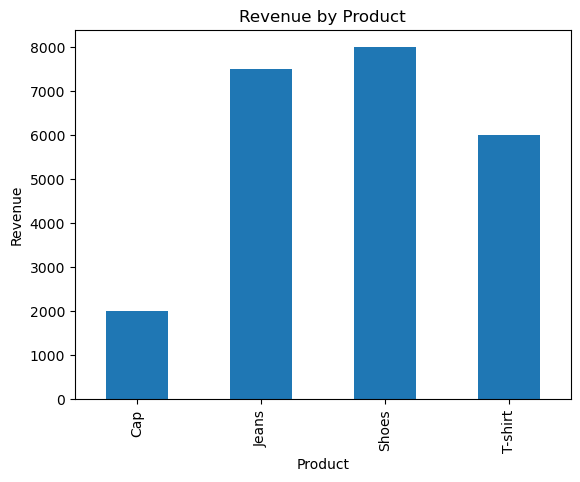


📊 Overall Totals:
   total_qty_sold  total_revenue
0              35        23500.0


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# Query 1: Summary by product
query1 = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df1 = pd.read_sql_query(query1, conn)
print("📊 Sales Summary by Product:")
print(df1)

# Plot bar chart
df1.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.show()

# Query 2: Overall totals
query2 = """
SELECT 
       SUM(quantity) AS total_qty_sold, 
       SUM(quantity * price) AS total_revenue
FROM sales
"""
df2 = pd.read_sql_query(query2, conn)
print("\n📊 Overall Totals:")
print(df2)

# Close connection
conn.close()
